## Pre-processing samples following doublet removal

Load necessary libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
library("xlsx")
library("ggplot2")
library(ggplot2)
library(cowplot)
library(svglite)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Load experimental samples

In [ ]:
VTA_YFP.data <-Read10X(data.dir = "D:/scRNAseq/30-453842648/01_analysis/cellranger_count/YFP/raw_feature_bc_matrix")
colnames(VTA_YFP.data) = paste0(colnames(VTA_YFP.data),"VTA_YFP")
VTA_YFP<- CreateSeuratObject(counts = VTA_YFP.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_YFP))
VTA_YFP <- RenameCells(VTA_YFP, new.names = new_barcodes)
VTA_YFP@meta.data$stim <- "VTA_YFP"

VTA_YFP_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/YFP/Final_nondoublets_groups_cntl.txt"))
VTA_YFP_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/YFP/Final_doublets_groups_cntl.txt"))
VTA_YFP<-subset(x=VTA_YFP,cells=VTA_YFP_clean)

In [ ]:
VTA_LH.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/LH/raw_feature_bc_matrix")
colnames(VTA_LH.data) = paste0(colnames(VTA_LH.data),"VTA_LH")
VTA_LH<- CreateSeuratObject(counts = VTA_LH.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_LH))
VTA_LH <- RenameCells(VTA_LH, new.names = new_barcodes)
VTA_LH@meta.data$stim <- "VTA_LH"

VTA_LH_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/LH/Final_nondoublets_groups_cntl.txt"))
VTA_LH_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/LH/Final_doublets_groups_cntl.txt"))
VTA_LH<-subset(x=VTA_LH,cells=VTA_LH_clean)

In [ ]:
VTA_NAc.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/NAc/raw_feature_bc_matrix")
colnames(VTA_NAc.data) = paste0(colnames(VTA_NAc.data),"VTA_NAc")
VTA_NAc<- CreateSeuratObject(counts = VTA_NAc.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_NAc))
VTA_NAc <- RenameCells(VTA_NAc, new.names = new_barcodes)
VTA_NAc@meta.data$stim <- "VTA_NAc"

VTA_NAc_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/NAc/Final_nondoublets_groups_cntl.txt"))
VTA_NAc_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/NAc/Final_doublets_groups_cntl.txt"))
VTA_NAc<-subset(x=VTA_NAc,cells=VTA_NAc_clean)

In [ ]:
VTA_PFC.data <-Read10X(data.dir = "D:/scRNAseq/30-573274809/01_analysis/cellranger_count/PFC/raw_feature_bc_matrix")
colnames(VTA_PFC.data) = paste0(colnames(VTA_PFC.data),"VTA_PFC")
VTA_PFC<- CreateSeuratObject(counts = VTA_PFC.data, min.cells = 3, min.features = 200, project = "VTA_input")
new_barcodes <- gsub("-1","",colnames(VTA_PFC))
VTA_PFC <- RenameCells(VTA_PFC, new.names = new_barcodes)
VTA_PFC@meta.data$stim <- "VTA_PFC"

VTA_PFC_clean<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/PFC/Final_nondoublets_groups_cntl.txt"))
VTA_PFC_doublet<-rownames(read.table(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Doublet_processing/PFC/Final_doublets_groups_cntl.txt"))
VTA_PFC<-subset(x=VTA_PFC,cells=VTA_PFC_clean)

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_YFP), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_YFP, slot = 'counts'))
VTA_YFP[['percent.mito']] <- percent.mito


In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_LH), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_LH, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object =VTA_LH, slot = 'counts'))
VTA_LH[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_NAc), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_NAc, slot = 'counts'))
VTA_NAc[['percent.mito']] <- percent.mito

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =VTA_PFC), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = VTA_PFC, slot = 'counts'))
VTA_PFC[['percent.mito']] <- percent.mito

Re-applying filtering parameters (redundant but to make sure parameters are applied)

In [ ]:
VTA_YFP <- subset(x = VTA_YFP, subset = nCount_RNA > 700 & nCount_RNA < 25000 & percent.mito < 0.01)
VTA_LH<- subset(x = VTA_LH, subset = nCount_RNA > 800 & nCount_RNA < 25000 & percent.mito < 0.01)
VTA_NAc <- subset(x = VTA_NAc, subset = nCount_RNA > 800 & nCount_RNA < 25000 & percent.mito < 0.01)
VTA_PFC <- subset(x = VTA_PFC, subset = nCount_RNA > 900 & nCount_RNA < 25000 & percent.mito < 0.01)

### Data normalization, scaling, and dimensionality reduction

In [ ]:
VTA_YFP<- NormalizeData(object = VTA_YFP,verbose = FALSE) 
VTA_LH <- NormalizeData(object = VTA_LH,verbose = FALSE) 
VTA_NAc <- NormalizeData(object = VTA_NAc,verbose = FALSE)
VTA_PFC <- NormalizeData(object = VTA_PFC,verbose = FALSE) 

In [ ]:
VTA_YFP<- FindVariableFeatures(object =VTA_YFP,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_YFP))
VTA_LH<- FindVariableFeatures(object =VTA_LH,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object =VTA_LH))
VTA_NAc<- FindVariableFeatures(object =VTA_NAc,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_NAc))
VTA_PFC<- FindVariableFeatures(object =VTA_PFC,selection.method = "vst", nfeatures = 2000, verbose = FALSE)
length(x = VariableFeatures(object = VTA_PFC))

In [ ]:
VTA.list<-objects()
VTA.list$VTA_YFP<-VTA_YFP
VTA.list$VTA_LH<-VTA_LH
VTA.list$VTA_NAc<-VTA_NAc
VTA.list$VTA_PFC<-VTA_PFC

In [ ]:
reference.list <- VTA.list[c("VTA_YFP","VTA_LH","VTA_NAc","VTA_PFC")]
VTA.anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:30) 

In [ ]:
VTA.integrated <- IntegrateData(anchorset = VTA.anchors, dims = 1:30) 

In [ ]:
DefaultAssay(object = VTA.integrated) <- "integrated" 

In [ ]:
VTA.integrated <- ScaleData(object = VTA.integrated, , vars.to.regress = c("nCount_RNA", "percent.mito"),verbose = FALSE)

In [ ]:
VTA.integrated <- RunPCA(object = VTA.integrated, npcs = 30, verbose = FALSE)

Data visualization

In [ ]:
VTA.integrated <- RunUMAP(object = VTA.integrated, reduction = "pca", dims = 1:30)

In [ ]:
p1 <- DimPlot(object = VTA.integrated, reduction = "umap", group.by = "stim")
plot_grid(p1)
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter1/allcell_umap.pdf",width=10,height=10)
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/Neurons_only_iter1/allcell_umap.svg")

Identifying clusters

In [ ]:
VTA.integrated <- FindNeighbors(object = VTA.integrated, dims=1:30)

In [ ]:
VTA.integrated <- FindClusters(VTA.integrated, resolution = 0.3, dims.use = 1:30, graph.name = "integrated_snn")

Visualizing data with cluster labels

In [ ]:
DimPlot(object = LS.integrated, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 0.65) +
theme_classic() + 
NoLegend() + 
theme(panel.background = element_rect(colour = "black", size=1, fill=NA),
     axis.line=element_blank())
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Paper_figures/All_cells_names.pdf",width=4,height=4)
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Paper_figures/All_cells_names.png",width=4,height=4)

Saving .rds files of seurat objects for the main integrated dataset as well as for each experimental group

In [ ]:
saveRDS(VTA.integrated, file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_integrated.rds")

In [ ]:
saveRDS(VTA_YFP, file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_YFP.rds")
saveRDS(VTA_LH, file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_LH.rds")
saveRDS(VTA_NAc, file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_NAc.rds")
saveRDS(VTA_PFC, file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_PFC.rds")

### Re-loading integrated data for downstream processing

In [2]:
VTA.integrated<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_integrated.rds")
VTA_YFP<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_YFP.rds")
VTA_LH<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_LH.rds")
VTA_NAc<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_PFC.rds")
VTA_PFC<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_PFC.rds")

### Cell cluster renaming / assignment

In [3]:
new.ident <- c("Micro1","Oligo1","Neuron1","Neuron2","OPC","Astrocyte","Neuron3","Neuron4","Neuron5","Oligo2","Micro2","Micro3","Neuron6","Neuron7","Micro4","Misc1","Micro5","Neuron8","Misc2","Misc3","Misc4","Misc5")
names(x = new.ident) <- levels(x =VTA.integrated)
VTA.integrated<- RenameIdents(object =VTA.integrated, new.ident)

### Subsetting out major cell type classes

In [4]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(VTA.integrated@assays$RNA@data[,which(Idents(object=VTA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_VTA_YFP",sep=""),intersect(colnames(VTA_YFP@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_LH",sep=""),intersect(colnames(VTA_LH@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_NAc",sep=""),intersect(colnames(VTA_NAc@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_VTA_PFC",sep=""),intersect(colnames(VTA_PFC@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))}


In [5]:
# barcode for simpler cell type
# re-create barcode for each cell type
#new.ident <- c("Neuron_1", "Oligo_1", "Astrocyte_1", "Neuron_2", "Neuron_3",  "Astrocyte_2", "OPC_1", "Neuron_4", "Microglia", "Unassigned_1", "Neuron_5", "Pericytes", "OPC_2","Neuron_6","Neuron_7","Mural","Astrocyte_3","Neuron_8","Oligo_2","unassigned_2","unassigned_3")
Neuron_barcode<-c(Neuron1_barcode,Neuron2_barcode,Neuron3_barcode, Neuron4_barcode,Neuron5_barcode,Neuron6_barcode,Neuron7_barcode)
Neuron_barcode_VTA_YFP<-intersect(Neuron_barcode,rownames(VTA_YFP@meta.data))
Neuron_barcode_VTA_LH<-intersect(Neuron_barcode,rownames(VTA_LH@meta.data))
Neuron_barcode_VTA_NAc<-intersect(Neuron_barcode,rownames(VTA_NAc@meta.data))
Neuron_barcode_VTA_PFC<-intersect(Neuron_barcode,rownames(VTA_PFC@meta.data))

In [6]:
#other cell-types as well
Astrocyte_barcode<-c(Astrocyte_barcode)
Oligo_barcode<-c(Oligo1_barcode,Oligo2_barcode)
Microglia_barcode<-c(Micro1_barcode, Micro2_barcode, Micro3_barcode, Micro4_barcode, Micro5_barcode)
OPC_barcode<-c(OPC_barcode)
Misc_barcode<-c(Misc1_barcode, Misc2_barcode, Misc3_barcode, Misc4_barcode, Misc5_barcode)

Saving cell-type barcodes for further analysis

In [ ]:
saveRDS(Neuron_barcode_VTA_YFP, file="Neuron_VTA_YFP_id.rds")
saveRDS(Neuron_barcode_VTA_LH, file="Neuron_VTA_LH_id.rds")
saveRDS(Neuron_barcode_VTA_NAc, file="Neuron_VTA_NAc_id.rds")
saveRDS(Neuron_barcode_VTA_PFC, file="Neuron_VTA_PFC_id.rds")

Re-labeling cell clusters based on classes

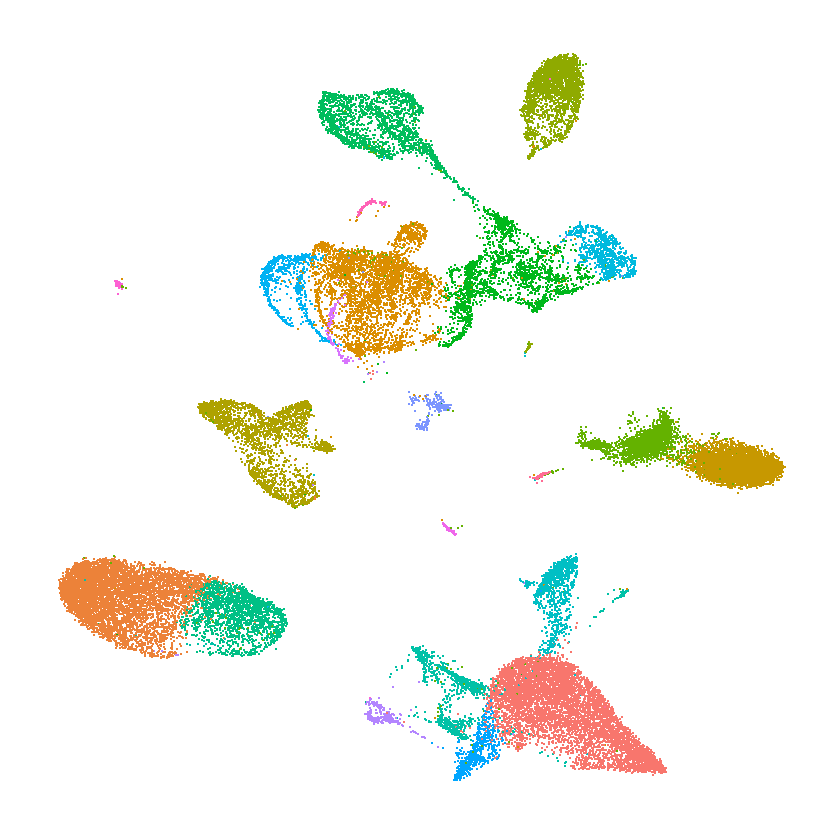

In [7]:
DimPlot(object = VTA.integrated,reduction = "umap", label = FALSE, repel = TRUE, pt.size = 0.1, label.size=4) +
theme_classic() + 
NoLegend() + 
theme(axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
#ggsave(file="",width=3,height=3, units="in")
#ggsave(file="",width=3,height=3, units="in")

Plotting cells by experimental group

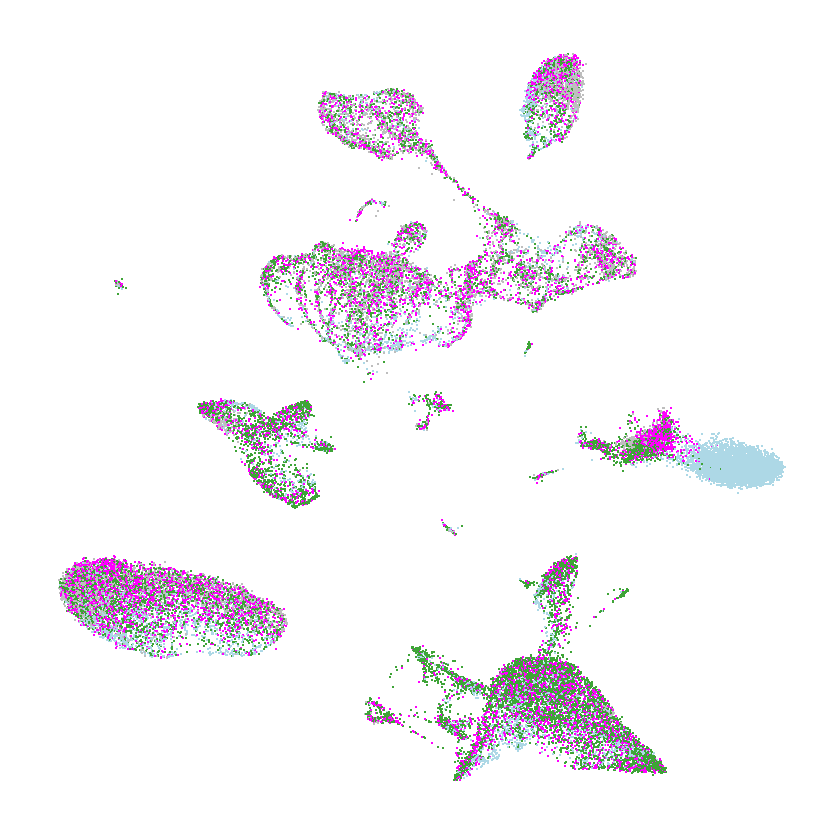

In [8]:
DimPlot(object = VTA.integrated, reduction = "umap", shuffle=TRUE,label = FALSE, repel = TRUE, pt.size = 0.10, label.size=2, group.by='stim', cols=c(VTA_YFP='gray',VTA_PFC='#3ea437',VTA_LH='magenta',VTA_NAc='lightblue')) +
theme_classic() + 
NoLegend() + 
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
#ggsave(file="",width=3,height=3, units="in")
#ggsave(file="",width=3,height=3, units="in")

### Celltype counts

In [9]:
new.ident <- c("Microglia","Oligo","Neuron","Neuron","OPC","Astrocyte","Neuron","Neuron","Neuron","Oligo","Microglia","Microglia","Neuron","Neuron","Microglia","Misc","Microglia","Neuron","Misc","Misc","Misc","Misc")
names(x = new.ident) <- levels(x =VTA.integrated)
VTA.integrated<- RenameIdents(object =VTA.integrated, new.ident)

In [10]:
Cells_in_clusters <- as.data.frame(table(Idents(VTA.integrated)))

In [11]:
Cells_in_clusters

Var1,Freq
<fct>,<int>
Microglia,9974
Oligo,8273
Neuron,16955
OPC,2732
Astrocyte,2695
Misc,839


In [12]:
colnames(Cells_in_clusters)[1] <- "Cluster"
colnames(Cells_in_clusters)[2] <- "Number"

In [13]:
Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("Astrocyte","Oligo","Neuron","OPC","Microglia","Misc"))

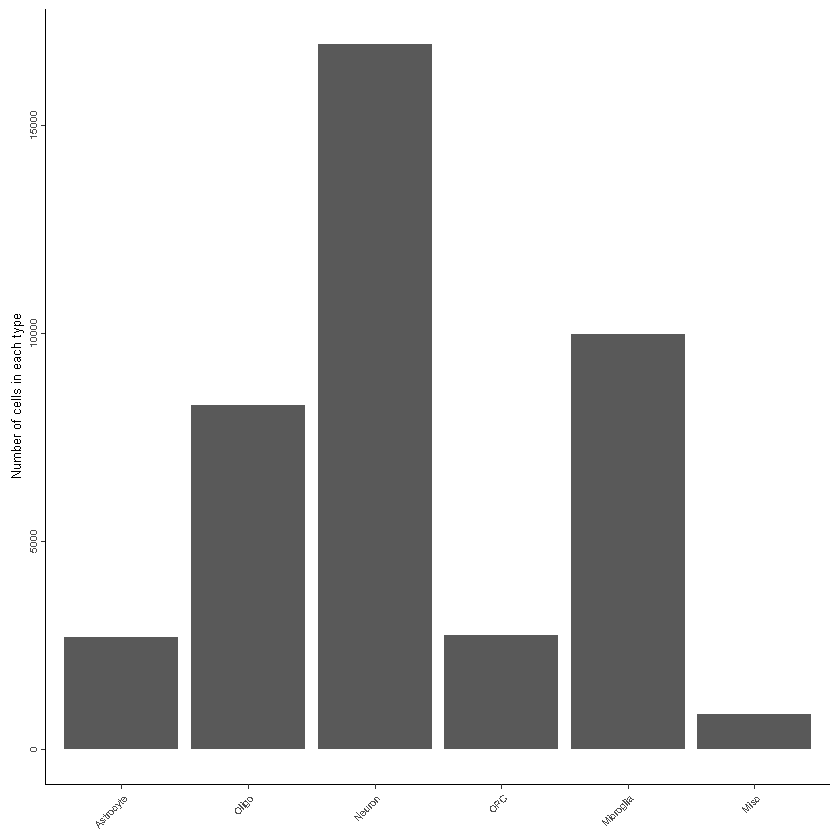

In [14]:
#group.colors <- c(LS_sal="#23bbef",LS_mor="#fc8b84", LS_nal="#21d936")
p <- ggplot(data=Cells_in_clusters, aes (x=Cluster, y=Number)) +
geom_bar(stat="identity", position="identity") +
#scale_y_continuous(breaks = seq(0, 35000, by = 7000), limits=c(0,35000), expand = c(0, 0))+
theme_classic() +
    theme(plot.title=element_blank(),
          axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.text.x=element_text(angle=45, hjust=1),
         axis.title=element_text(size=8),
         axis.title.x=element_blank(),
         axis.text.y=element_text(angle=90, hjust=.5))+ggtitle("Number of cells in each group") +
#expand_limits(x = 0, y = 0) +
ylab('Number of cells in each type')
#scale_fill_manual(values=group.colors)
p

#ggsave(file="",width=1.25,height=1.5)
#ggsave(file="",width=1.25,height=1.5)

Calculating the proportion of cells within each group

In [15]:
subset <- as.data.frame(table(Idents(VTA.integrated)))
cluster_numbers<- subset[2]

In [16]:
subset <- rep(array(unlist(cluster_numbers)),4)

In [17]:
cluster_by_group <- as.data.frame(table(Idents(VTA.integrated), VTA.integrated$stim))
colnames(cluster_by_group) <- c("Cluster","Group","Cells")
cluster_by_group$Total <- subset

In [18]:
cluster_by_group <- transform(cluster_by_group, prop = Cells/Total)

In [19]:
cluster_by_group$Group <- factor(cluster_by_group$Group, levels = c("VTA_YFP","VTA_LH","VTA_PFC","VTA_NAc"), ordered=TRUE)
cluster_by_group$Cluster <- factor(cluster_by_group$Cluster, levels = c("Astrocyte","Oligo","Neuron","OPC","Microglia","Misc"))

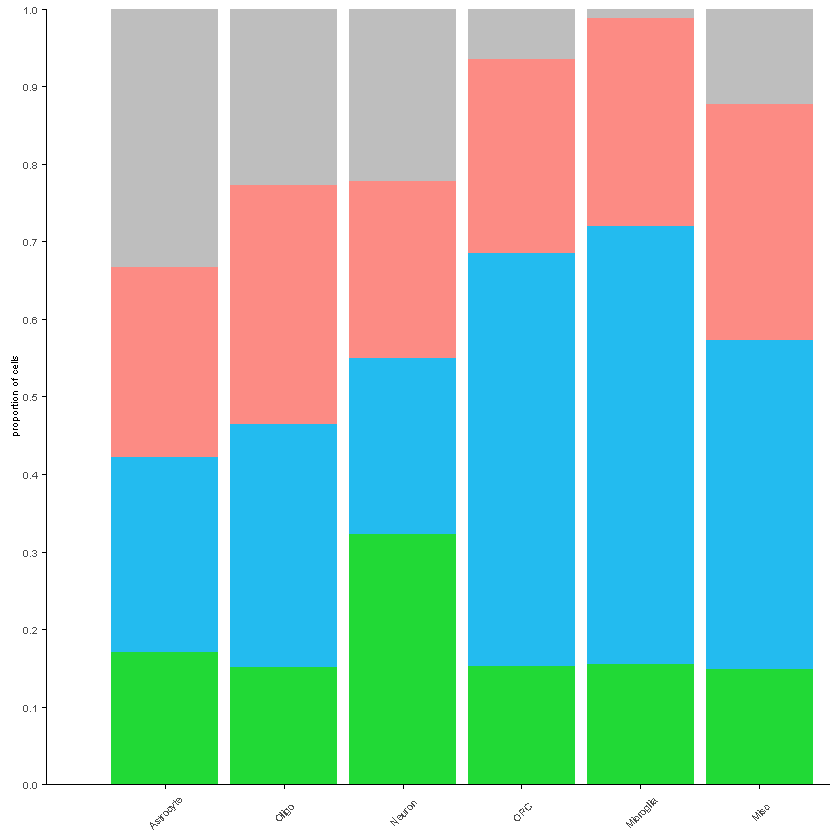

In [20]:
group.colors <- c(VTA_YFP="gray",VTA_LH="#fc8b84", VTA_PFC="#23bbef", VTA_NAc="#21d936")
p <- ggplot(data=cluster_by_group, aes (x=Cluster, y=prop, fill=Group)) +
    geom_bar(stat="identity", position="stack") +
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits=c(0,1), expand = c(0, 0))+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25), 
          axis.text.y=element_text(size=6),
          axis.title.x = element_blank(), 
          axis.title.y = element_text(size=6),
          axis.text.x=element_text(angle = 45, vjust=.5, hjust = .5, size=6, ) ,
          plot.title=element_blank()) +
    theme(legend.position='bottom',
          legend.title = element_text(size = 6),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25),
         legend.key.size = unit(0.1, "in"))+
    ggtitle("Proportion of cells") +
    expand_limits(x = 0, y = 0) +
    scale_fill_manual(values=group.colors)+
    ylab("proportion of cells") + NoLegend()

#ggsave(file="",width=1.5,height=1.5)
#ggsave(file="",height=1.5,width=1.5)

p

### UMI and feature enrichment

In [21]:
Neuron_barcode<-c(Neuron1_barcode,Neuron2_barcode,Neuron3_barcode,Neuron4_barcode,Neuron5_barcode,Neuron6_barcode,Neuron7_barcode)
Astrocyte_barcode<-c(Astrocyte_barcode)
Oligo_barcode<-c(Oligo1_barcode,Oligo2_barcode)
Microglia_barcode<-c(Micro1_barcode, Micro2_barcode, Micro3_barcode, Micro4_barcode, Micro5_barcode)
OPC_barcode<-c(OPC_barcode)
Misc_barcode<-c(Misc1_barcode, Misc2_barcode, Misc3_barcode, Misc4_barcode, Misc5_barcode)

In [22]:
type<-numeric()
for (i in 1:dim(VTA.integrated@meta.data)[1]){
    if(rownames(VTA.integrated@meta.data)[i] %in% Neuron_barcode){type[i]<-"Neuron"}
    else if(rownames(VTA.integrated@meta.data)[i] %in% Astrocyte_barcode){type[i]<-"Astrocyte"}
        else if(rownames(VTA.integrated@meta.data)[i] %in% Oligo_barcode){type[i]<-"Oligo"}
             else if(rownames(VTA.integrated@meta.data)[i] %in% Microglia_barcode){type[i]<-"Microglia"}
                 else if(rownames(VTA.integrated@meta.data)[i] %in% OPC_barcode){type[i]<-"OPC"}
                    else if(rownames(VTA.integrated@meta.data)[i] %in% Misc_barcode){type[i]<-"Misc"}
                        else{type[i]<-"NA"}
}
VTA.integrated@meta.data$type<-type                    

In [23]:
VTA.integrated@meta.data$type<-factor(VTA.integrated@meta.data$type,levels=c("Neuron","Astrocyte","Oligo","OPC","Microglia","Misc"))

In [24]:
colors<-c("Astrocyte"="#8a8a8a","Oligo"="#8a8a8a","Neuron"="#fc9403","OPC"="#8a8a8a","Microglia"="#8a8a8a","Misc"="#8a8a8a")

In [25]:
subset_meta<-subset(VTA.integrated@meta.data,type=="Neuron"|type=="Astrocyte"|type=="Oligo"|type=="OPC"|type=="Microglia"|type=="Misc")

Warning message:
"`fun.y` is deprecated. Use `fun` instead."


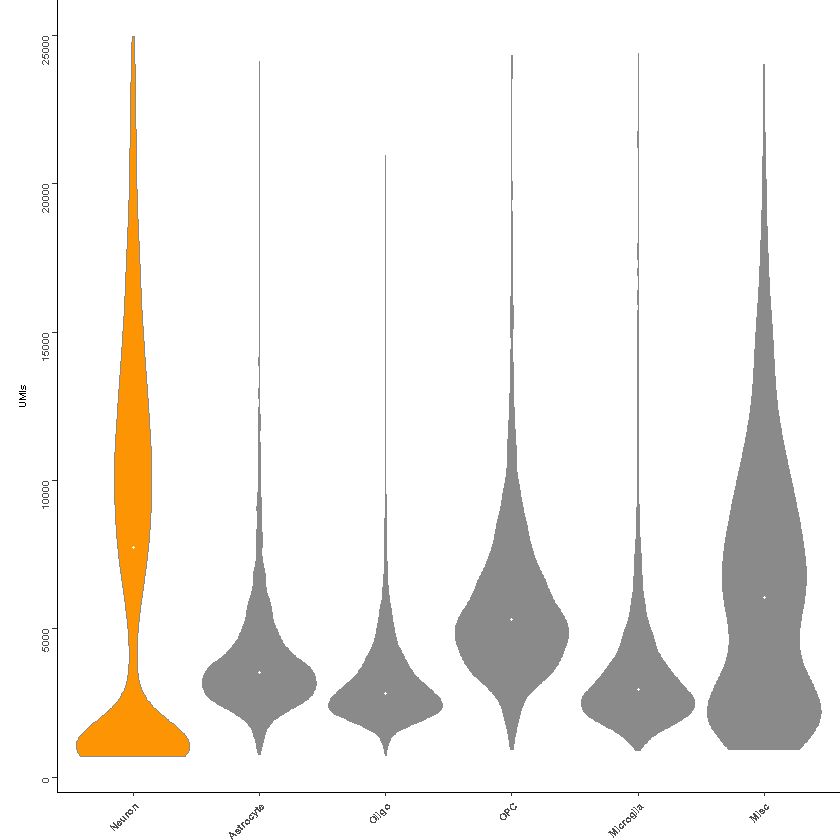

In [26]:
pu <- ggplot(subset_meta,aes_string(x="type",y="nCount_RNA",fill="type"))+
geom_violin(scale = "width", color="#8a8a8a")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.5, color="white")+ylab("UMIs")+ 
theme_classic()+
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=6, angle=90),axis.title.y=element_text(size=6,angle=90,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=6,face="bold", angle=45, hjust=1)
,axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size=0.25),legend.position="none",plot.margin = unit(c(0, 0,0, 0), "cm")) 
#ggsave(file="",height=1.5, width=1.5 )
#ggsave(file="", height=1.5, width=1.5)
pu

Warning message:
"`fun.y` is deprecated. Use `fun` instead."


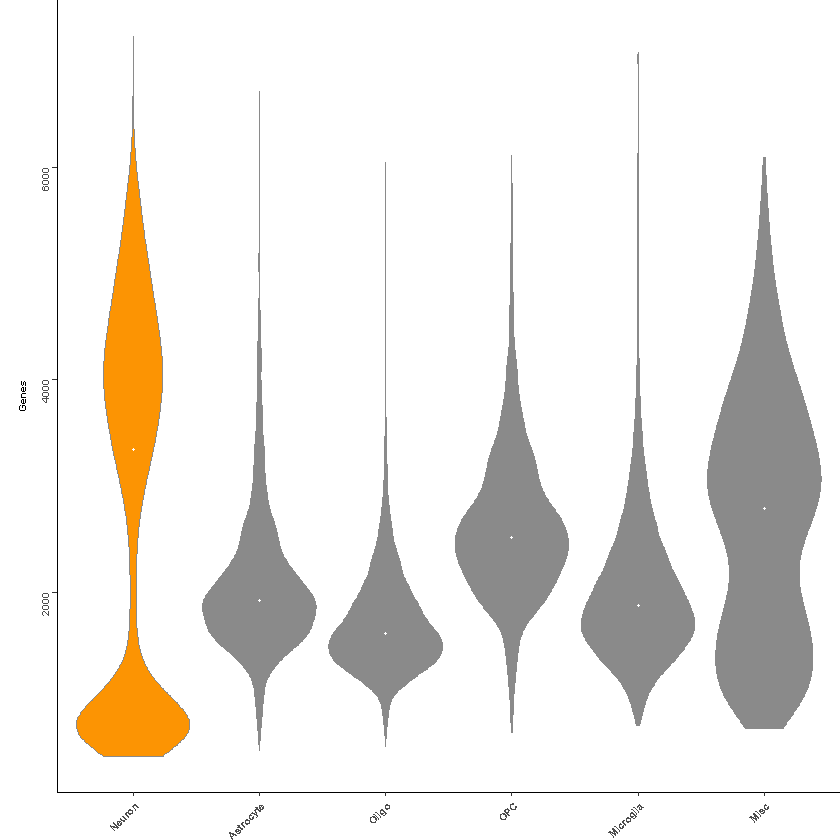

In [27]:
pg <- ggplot(subset_meta,aes_string(x="type",y="nFeature_RNA",fill="type"))+
geom_violin(scale = "width", color="#8a8a8a")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.5, color="white")+ylab("Genes")+ 
theme_classic()+
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=6, angle=90),axis.title.y=element_text(size=6,angle=90,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=6,face="bold", angle=45, hjust=1)
,axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size=0.25),legend.position="none",plot.margin = unit(c(0, 0,0, 0), "cm"))
#ggsave(file="",height=1.5, width=1.5)
#ggsave(file="", height=1.5, width=1.5)
pg

### UMI and gene ratio

In [28]:
wanted_col <- c("type","nCount_RNA","nFeature_RNA")

In [29]:
subset <- as.data.frame(VTA.integrated@meta.data[,wanted_col])

In [30]:
subset$type <- factor(subset$type, levels=c("Neuron","Astrocyte","Oligo","OPC","Microglia","Misc"))

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"position_dodge requires non-overlapping x intervals"


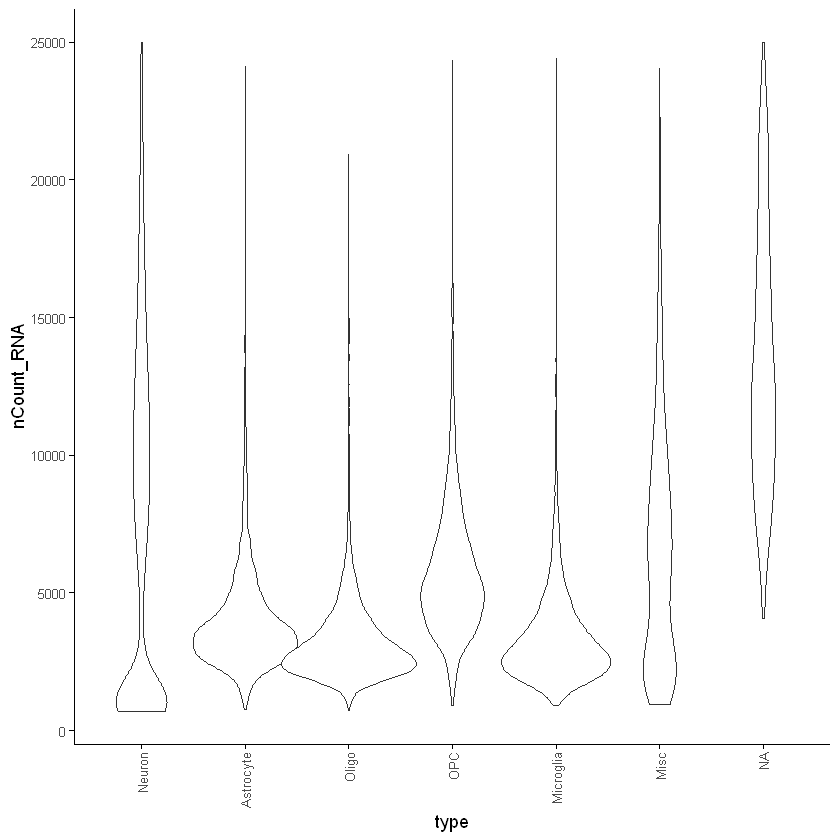

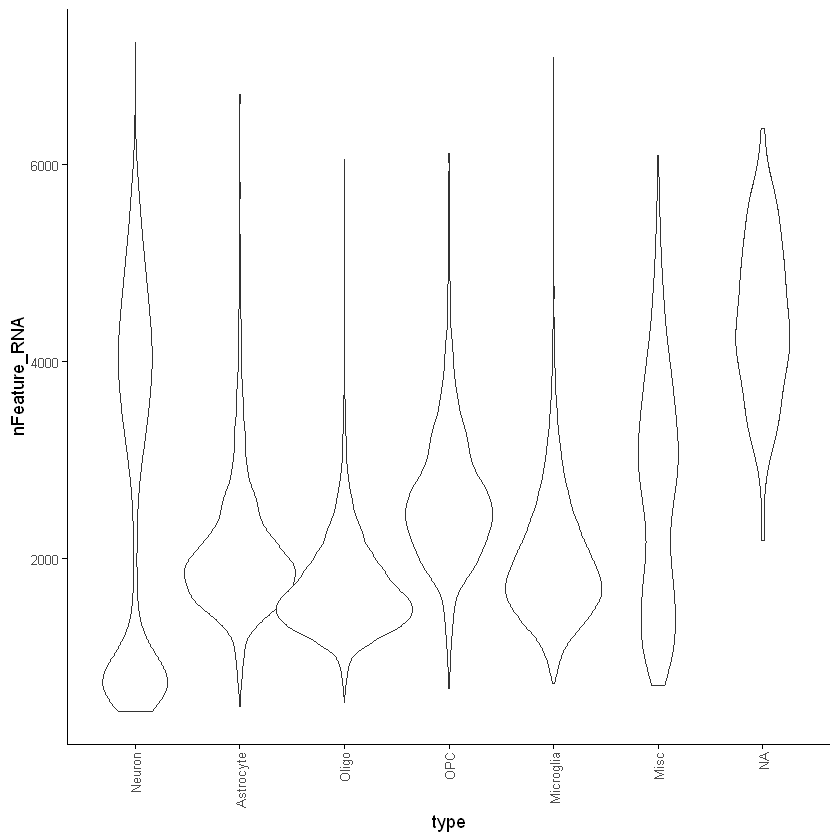

In [31]:
pu <- ggplot(subset, aes(x=type, y=nCount_RNA)) + 
geom_violin(width=1.3, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.5, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8) ,plot.title=element_text(size=10, face="bold")) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))
pu

pg <- ggplot(subset, aes(x=type, y=nFeature_RNA)) + 
geom_violin(width=1.3, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.5, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8) ,plot.title=element_text(size=10, face="bold")) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))
pg

In [32]:
UMI_median <- as.data.frame(ggplot_build(pu)$data[[2]]$y)
colnames(UMI_median)[1] <- "UMI"
gene_median <- as.data.frame(ggplot_build(pg)$data[[2]]$y)
colnames(gene_median)[1] <- "Gene"

Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"


In [33]:
Cell_type <- as.data.frame(c("Neuron","Astrocyte","Oligo","OPC","Microglia","Misc","NA"))
colnames(Cell_type)[1] <- "Cluster"

In [34]:
stat_table <- cbind(Cell_type,UMI_median,gene_median)
stat_table$ratio <- stat_table$UMI / stat_table$Gene

In [35]:
stat_table$Cluster <- factor(stat_table$Cluster, levels=c("Neuron","Astrocyte","Oligo","OPC","Microglia","Misc"))

In [36]:
stat_table

Cluster,UMI,Gene,ratio
<fct>,<dbl>,<dbl>,<dbl>
Neuron,7746.5,3342.0,2.317923
Astrocyte,3523.0,1925.0,1.830130
Oligo,2838.0,1614.0,1.758364
OPC,5322.0,2518.5,2.113163
Microglia,2954.0,1875.0,1.575467
Misc,6054.0,2791.0,2.169115
NA,12678.0,4388.0,2.889243


Warning message:
"Removed 1 rows containing missing values (geom_bar)."


$y
[1] "UMI:Gene ratio"

attr(,"class")
[1] "labels"

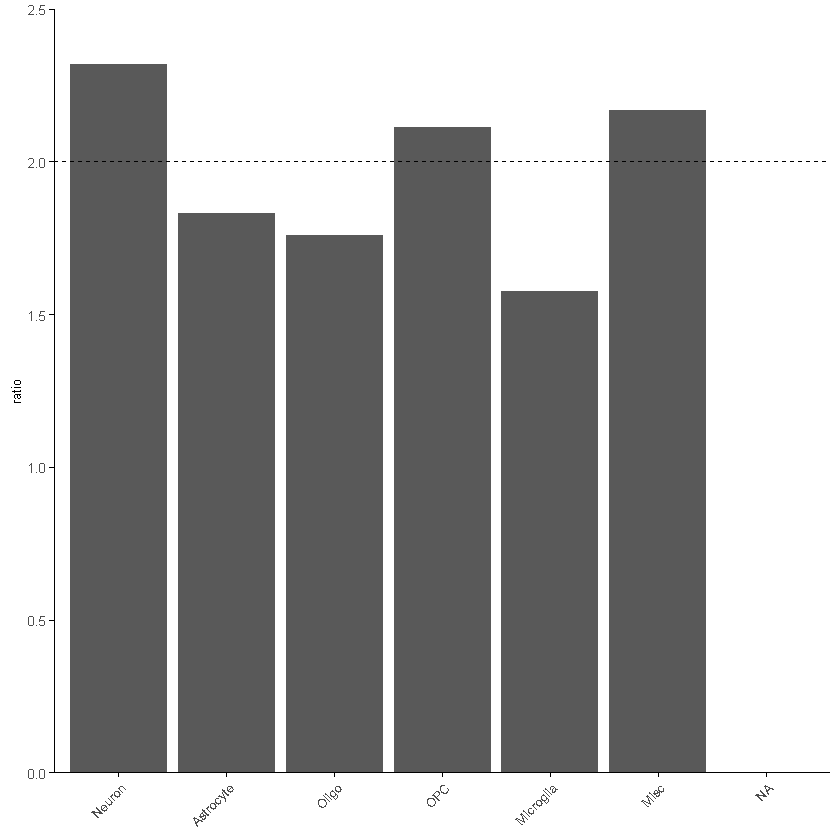

In [37]:
ggplot(data=stat_table, aes (x=Cluster, y=ratio)) +
    geom_bar(stat="identity", position="identity") +
    scale_y_continuous(breaks = seq(0, 2.5, by = 0.5), limits=c(0,2.5), expand = c(0, 0))+
    geom_hline(yintercept=2, linetype="dashed", size=0.25)+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25),  
          axis.text.y=element_text(size=8),
          axis.text.x=element_text(angle = 45, hjust=1, size=8), 
          plot.title=element_text(size=10)) +
    theme(legend.title = element_text(size = 11),
          legend.text = element_text(size = 8), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.title.x=element_blank())+
    theme(axis.text=element_text(size=6),
         axis.title=element_text(size=8))
    ylab("UMI:Gene ratio")

#ggsave(file="",width=1.5,height=2)
#ggsave(file="",width=1.5,height=2)

### Violinplot for canonical markers

In [38]:
VTA.integrated<-readRDS(file = "/Users/stuberadmin/Documents/scRNAseq/Marta_VTA/All_cells_iter1/VTA_integrated.rds")

In [39]:
table(Idents(VTA.integrated))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6737 6289 4040 4005 2732 2695 2607 2314 2157 1984 1198 1008  880  783  724  334 
  16   17   18   19   20   21 
 307  169  151  120  119  115 

In [40]:
new.ident <- c("Microglia","Oligo","Neuron1","Neuron2","OPC","Astrocyte","Neuron3","Neuron4","Neuron5","Oligo","Microglia","Microglia","Neuron6","Neuron7","Microglia","Misc","Microglia","Neuron8","Misc","Misc","Misc","Misc")
names(x = new.ident) <- levels(x =VTA.integrated)
VTA.integrated<- RenameIdents(object =VTA.integrated, new.ident)

In [41]:
levels(VTA.integrated) <- ((c("Neuron1","Neuron2","Neuron3","Neuron4","Neuron5","Neuron6","Neuron7","Neuron8","Astrocyte","Oligo","OPC","Microglia","Misc")))

In [42]:
DefaultAssay(VTA.integrated) <- 'RNA'

Warning message:
"Removed 1 rows containing non-finite values (stat_ydensity)."


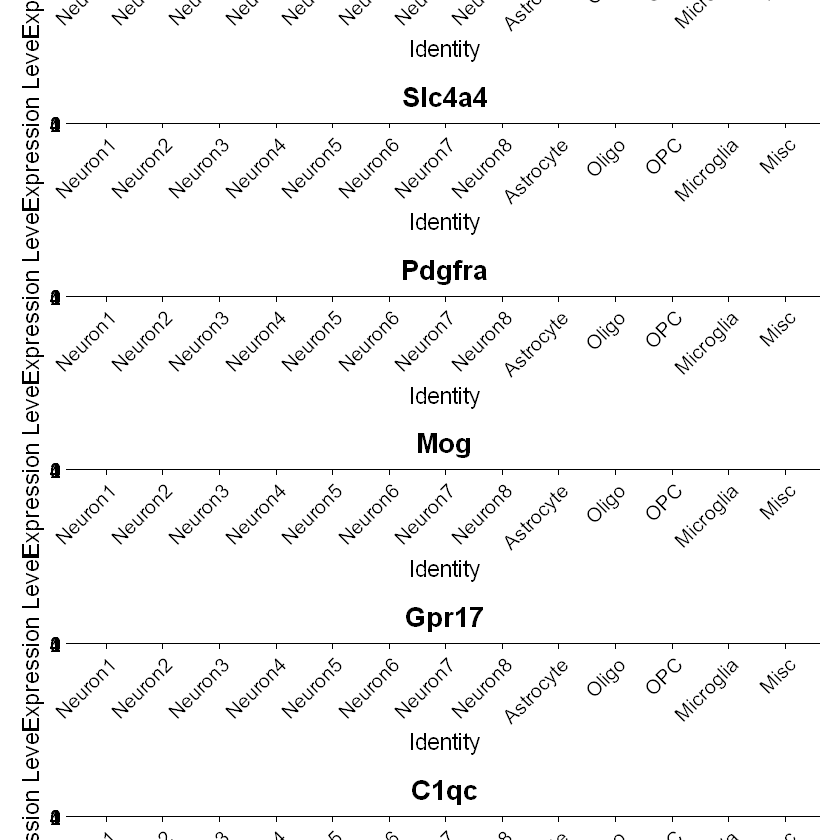

In [43]:
VlnPlot(VTA.integrated, features=c("Stmn2","Slc4a4","Pdgfra","Mog","Gpr17",'C1qc'), ncol=1, pt.size=0, same.y.lims=TRUE)
#ggsave('',width=10,height=20)